In [54]:
import face_recognition
from pathlib import Path
from pathlib import Path

from pathlib import Path

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from IPython.display import clear_output

In [55]:
path = Path('../data/celeb_dataset/img_align_celeba/img_align_celeba')
# find all images under the path


image_paths = list(path.glob('*.jpg'))

image_paths[0]

PosixPath('../data/celeb_dataset/img_align_celeba/img_align_celeba/145495.jpg')

In [56]:
#load first image
image = face_recognition.load_image_file(image_paths[0])
face_locations = face_recognition.face_locations(image)


[(86, 135, 176, 46)]


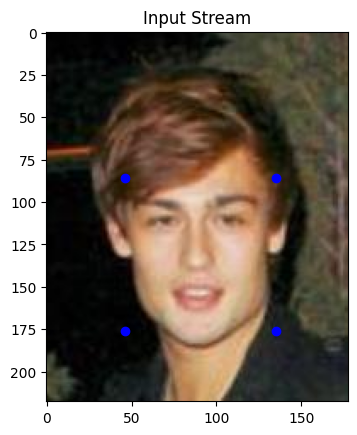

In [57]:
for i in range(10):
    image = face_recognition.load_image_file(image_paths[i])
    face_locations = face_recognition.face_locations(image)
    plt.title("Input Stream")
    plt.imshow(image)        

    # Find all the faces and face encodings in the current frame of video

    # If faces were found, we will mark it on frame with blue dots
    for face_location in face_locations:        
        plt.plot(face_location[1], face_location[0], 'bo')
        plt.plot(face_location[1], face_location[2], 'bo')
        plt.plot(face_location[3], face_location[2], 'bo')
        plt.plot(face_location[3], face_location[0], 'bo')
    print(face_locations)
    # Show frame...
    plt.show() 
    clear_output(wait=True)


In [58]:
not_found = []
for i,img_path in enumerate(image_paths):
    image = face_recognition.load_image_file(image_paths[i])
    face_locations = face_recognition.face_locations(image)
    if i % 1000 == 0:
        print('processed ', i, 'images')
    if i == 10000:
        break

    if len(face_locations) == 0:
        print('face not found in image: ', img_path)
        not_found.append(img_path)
         

processed  0 images
face not found in image:  ../data/celeb_dataset/img_align_celeba/img_align_celeba/000881.jpg
face not found in image:  ../data/celeb_dataset/img_align_celeba/img_align_celeba/122130.jpg
face not found in image:  ../data/celeb_dataset/img_align_celeba/img_align_celeba/157682.jpg
face not found in image:  ../data/celeb_dataset/img_align_celeba/img_align_celeba/027608.jpg
face not found in image:  ../data/celeb_dataset/img_align_celeba/img_align_celeba/115499.jpg
face not found in image:  ../data/celeb_dataset/img_align_celeba/img_align_celeba/123417.jpg
face not found in image:  ../data/celeb_dataset/img_align_celeba/img_align_celeba/197991.jpg
face not found in image:  ../data/celeb_dataset/img_align_celeba/img_align_celeba/171129.jpg
face not found in image:  ../data/celeb_dataset/img_align_celeba/img_align_celeba/159762.jpg
face not found in image:  ../data/celeb_dataset/img_align_celeba/img_align_celeba/175885.jpg


KeyboardInterrupt: 

In [ ]:
len(not_found)

264

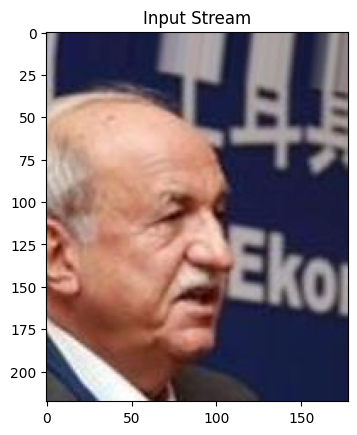

In [ ]:
for i in range(10):
    image = face_recognition.load_image_file(not_found[i])
    face_locations = face_recognition.face_locations(image)
    plt.title("Input Stream")
    plt.imshow(image)        

    # Find all the faces and face encodings in the current frame of video

    # If faces were found, we will mark it on frame with blue dots

    # Show frame...
    plt.show() 
    clear_output(wait=True)

In [59]:
import pandas as pd
import sweetviz as sv

In [60]:
df= pd.read_csv(r'/home/bence/ITU_notes/Algorithmic_fairness/FairFaceRecognition/data/celeb_dataset/list_attr_celeba.csv')

df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [61]:
# make image_id the index
df.set_index('image_id', inplace=True)

In [62]:
df.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [65]:
sv.analyze(df.to_numpy())

ValueError: "source" parameter should either be a string or a list of 2 elements: [dataframe, "Name"].